In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product, chain, combinations
from scipy import stats
from IPython.display import display, HTML
%matplotlib inline

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def get_file_name(name):
    return name.replace(':', '-')

In [8]:
inputFile = 'bnp.csv'

plotSize = (13, 10)
plotStyle = 'seaborn-v0_8-whitegrid'
saveFigures = False

In [3]:
df = pd.read_csv('data/' + inputFile)

In [4]:
df['progress'] = (df['timestamp'] - df['timestamp'].min()) / (df['timestamp'].max() - df['timestamp'].min())

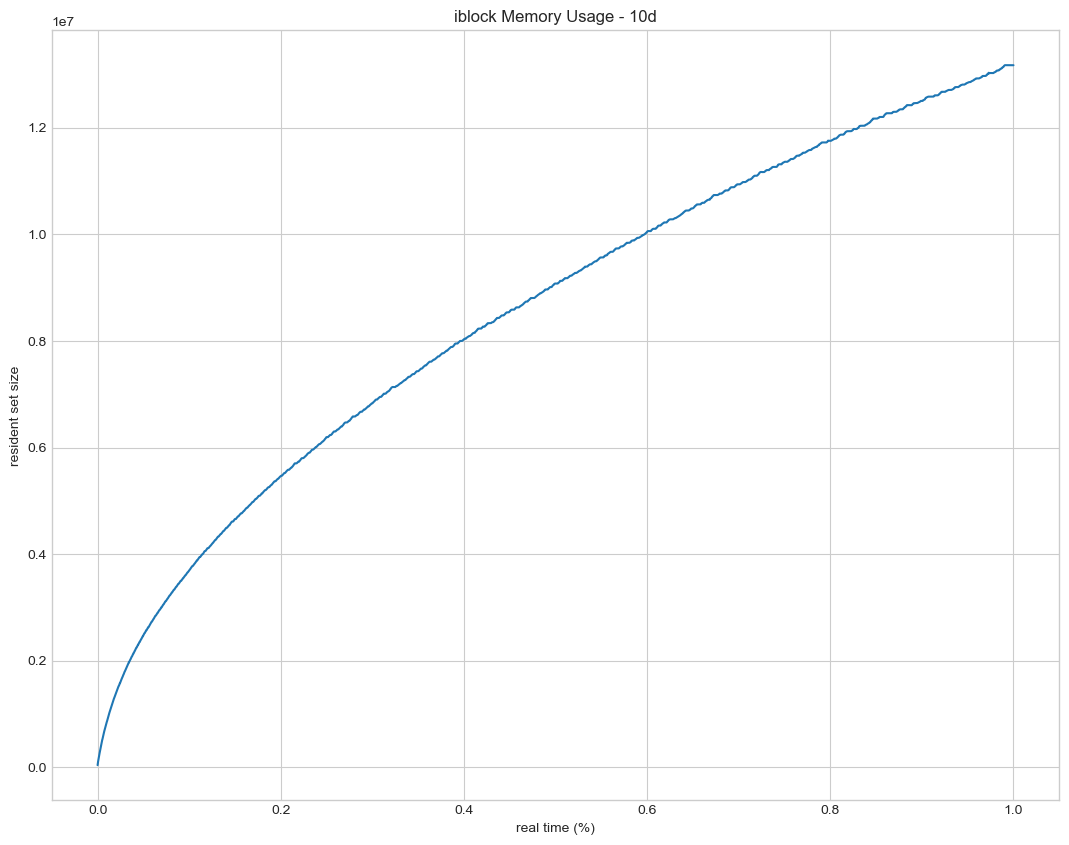

In [65]:
plt.figure(figsize=plotSize)
plt.style.use(plotStyle)
plt.plot(df['progress'], df['rss'], label='iblock')
plt.title('iblock Memory Usage - 10d')
plt.ylabel('resident set size')
plt.xlabel('real time (%)')
#plt.legend(loc="upper left", bbox_to_anchor=(0.05, 0.95))
plt.savefig('figures/bnp.eps', format='eps')
plt.show()

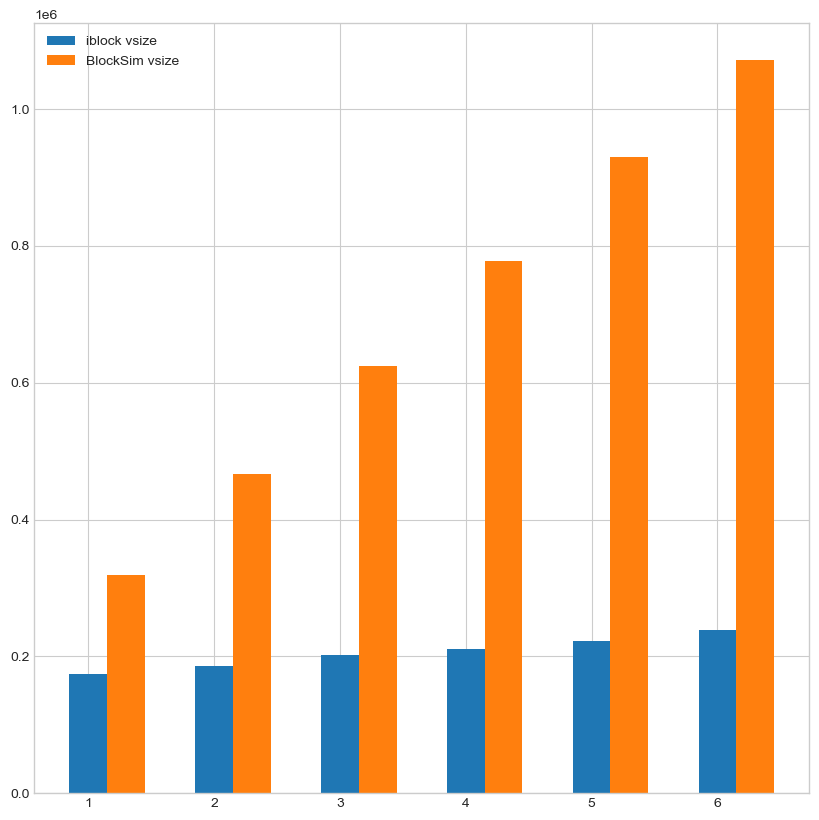

In [64]:
tot = pd.read_csv('data/tot.csv')

barwidth = 0.3

plt.figure(figsize=plotSize)
plt.bar(np.arange(1, 7), tot['ibvsz'], barwidth, label="iblock vsize")
plt.bar(np.arange(1, 7) + barwidth, tot['bsvsz'], barwidth, label="BlockSim vsize")
plt.legend()
plt.show()

# plt.figure(figsize=(10, 100))
# plt.bar(np.arange(1, 7), tot['ibtime'], barwidth, label="iblock time")
# plt.bar(np.arange(1, 7) + barwidth, tot['bstime'], barwidth, label="BlockSim time")
# plt.legend()
# plt.show()

In [76]:
df2 = pd.read_csv('data/bnptime.csv')
df2 = df2.iloc[::2]
df2['partialtime'] = df2['time'].diff()
df2['partialtime-diff'] = df2['partialtime'].diff()
df2['simsec-sec'] = 86400 / df2['partialtime']
df2['simsec-sec-diff'] = df2['simsec-sec'].diff()
df2 = df2.drop(0)
df2

,simtime,time,partialtime,partialtime-diff,simsec-sec,simsec-sec-diff
2,86400,100,100.0,NaN,864.000000,NaN
4,172800,297,197.0,97.0,438.578680,-425.421320
6,259200,592,295.0,98.0,292.881356,-145.697324
8,345600,983,391.0,96.0,220.971867,-71.909489
10,432000,1467,484.0,93.0,178.512397,-42.459470
12,518400,2030,563.0,79.0,153.463588,-25.048809
14,604800,2678,648.0,85.0,133.333333,-20.130255
16,691200,3396,718.0,70.0,120.334262,-12.999071
18,777600,4211,815.0,97.0,106.012270,-14.321992
20,864000,5138,927.0,112.0,93.203883,-12.808386


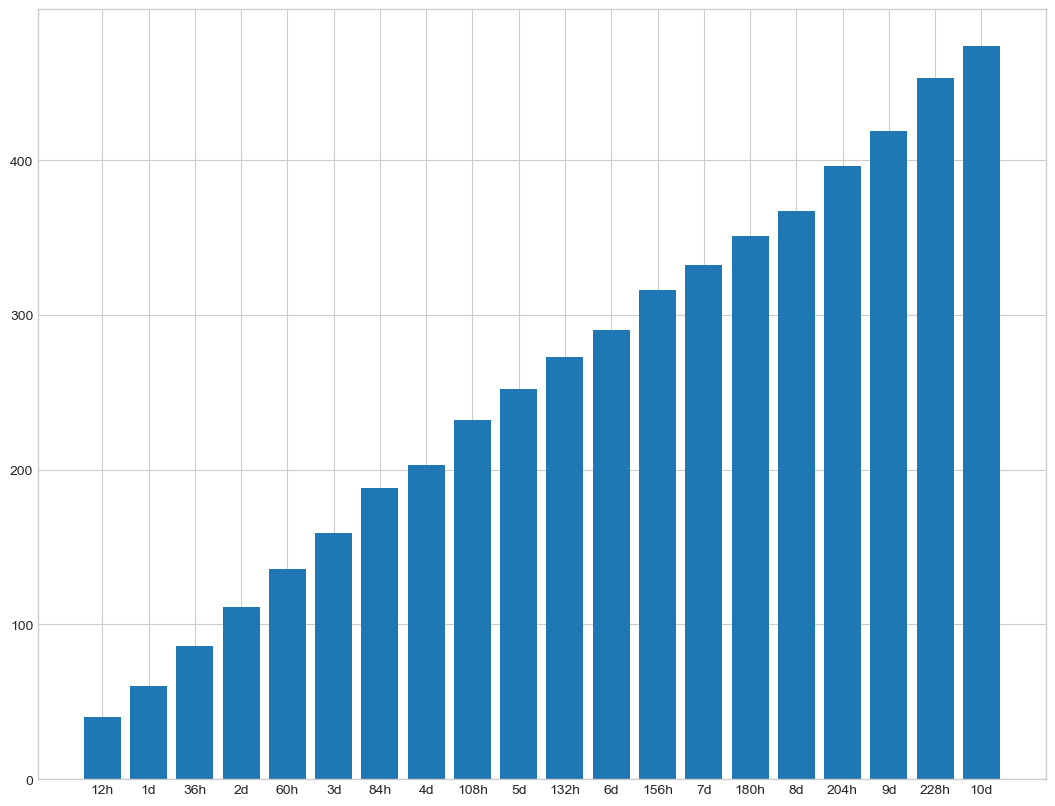

In [58]:
plt.figure(figsize=plotSize)
labels = ['12h', '1d', '36h', '2d', '60h', '3d', '84h', '4d', '108h', '5d', '132h', '6d', '156h', '7d', '180h', '8d', '204h', '9d', '228h', '10d']
plt.bar(labels, df2['partialtime'], label="partialtime")
plt.gca().set_xticks(labels)
plt.show()

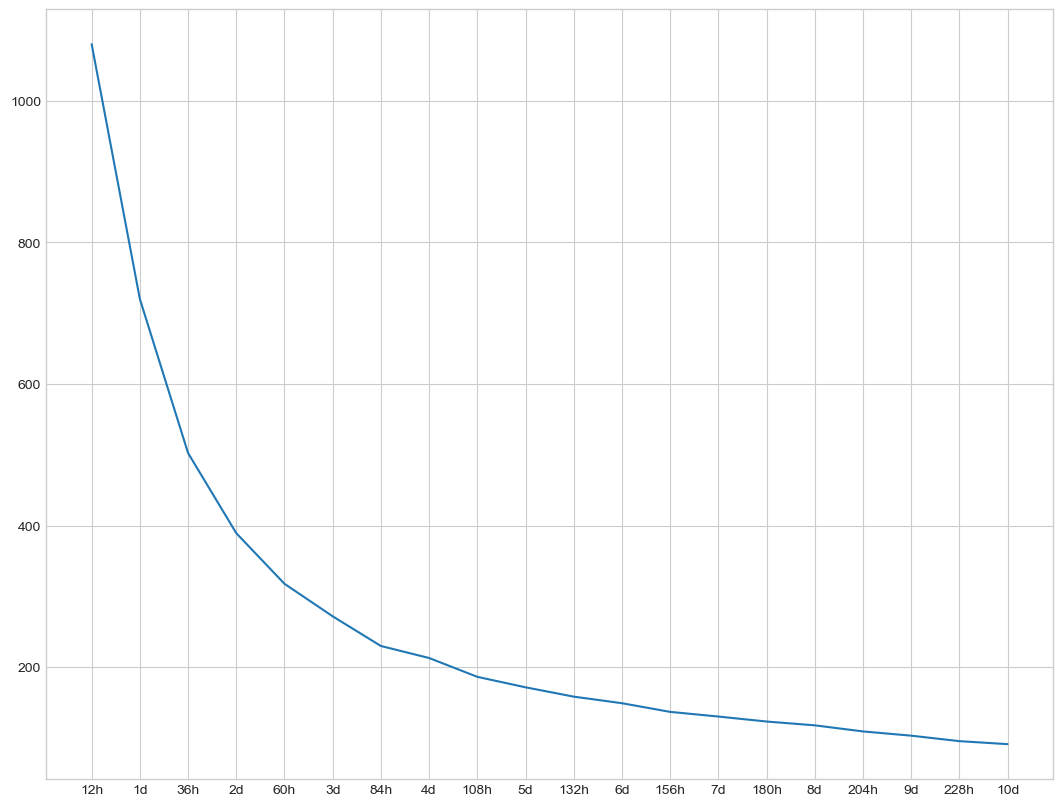

In [44]:
plt.figure(figsize=plotSize)
plt.plot(labels, df2['simsec-sec'], label="simsec/sec")
plt.gca().set_xticks(labels)
plt.show()

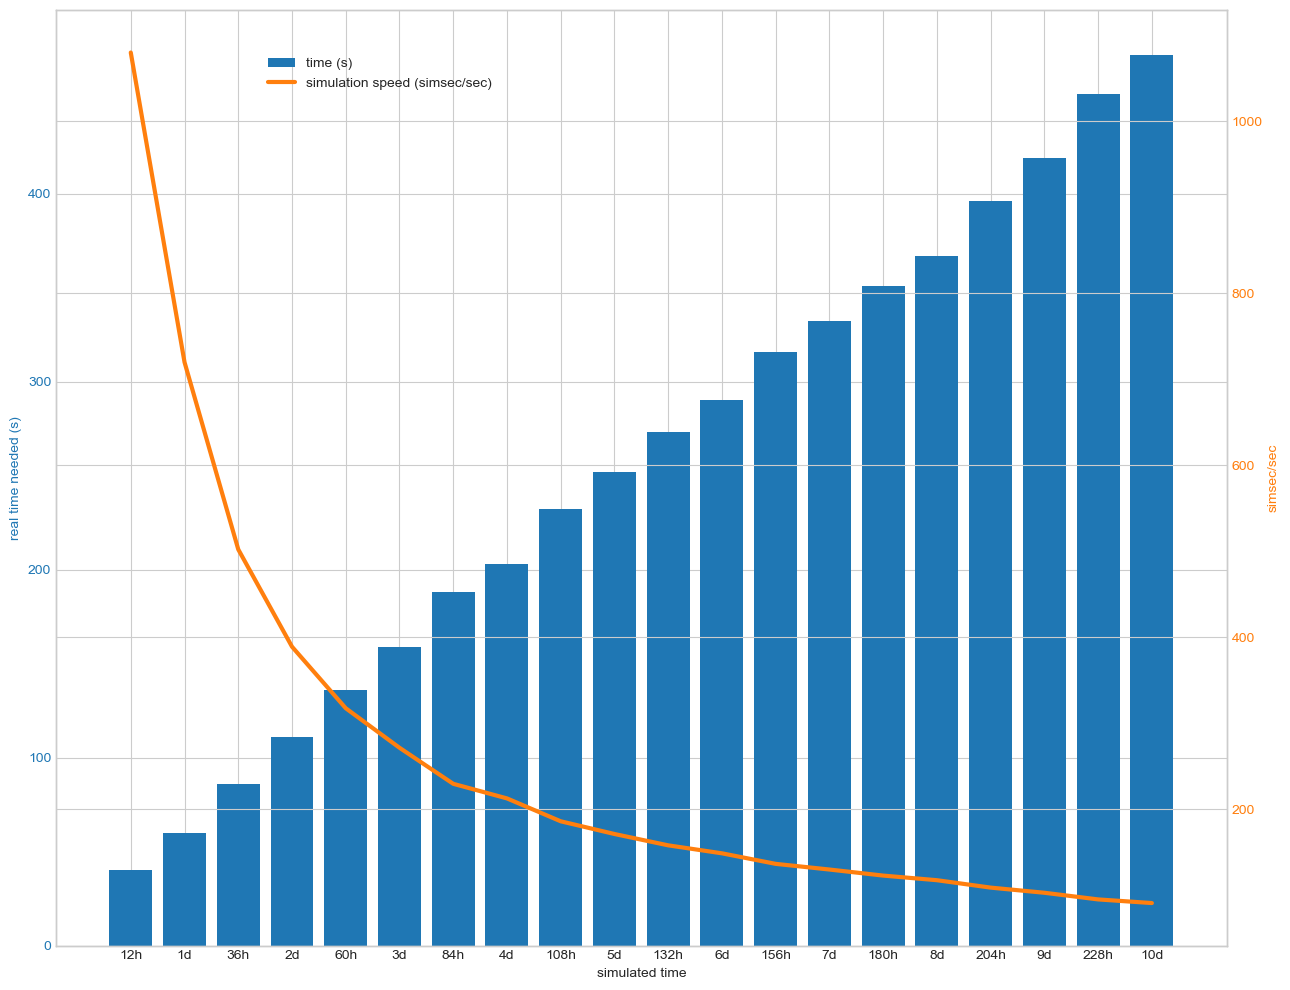

In [63]:
fig, ax1 = plt.subplots(figsize=plotSize)

color = 'tab:blue'
ax1.set_xlabel('simulated time')
ax1.set_ylabel('real time needed (s)', color=color)
ax1.bar(labels, df2['partialtime'], color=color, label='time (s)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('simsec/sec', color=color)
ax2.plot(labels, df2['simsec-sec'], color=color, linewidth=3, label="simulation speed (simsec/sec)")
ax2.tick_params(axis='y', labelcolor=color)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, lbls = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, lbls, loc='upper left', bbox_to_anchor=(0.2, 0.95))

fig.tight_layout()
if saveFigures:
    fig.savefig('figures/bnphist.eps', format='eps')
plt.show()